# Exploratory Data Analysis (EDA)
This notebook will import and clean the data and offer initial insights into the dataset.

# Business Problem
The stakeholder is SyriaTel, a telecommunications company in Syria, and this company wants to reduce money lost due to churn (customers leaving). The stakeholder wants to identify patterns found in churned customers in a US dataset so that they can implement strategies aimed at reducing their churn rate. These strategies will specifically target customers that can be classified as likely to churn.

# Import and Clean the Data

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
%matplotlib inline

plt.style.use('seaborn')

In [2]:
# import the dataset
df = pd.read_csv('..\\data\\telecom_data.csv')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [3]:
# drop exact duplicates (same exact values across rows)
# there shouldn't be any same rows because of unique values like area code + #
df = df.drop_duplicates()

In [4]:
# check for null data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

* The dataset looks fairly clean already (no non-null items). But there are object datatypes that I will likely have to handle in some way.

In [5]:
# Handle object types for international plan and voice mail plan
df.loc[df['international plan'] == 'no', 'international plan'] = 0
df.loc[df['international plan'] == 'yes', 'international plan'] = 1 

df.loc[df['voice mail plan'] == 'no', 'voice mail plan'] = 0
df.loc[df['voice mail plan']== 'yes', 'voice mail plan'] = 1

In [6]:
# Change churn to values: 1 (churned/True) 0 (no churn/False)
df.loc[df['churn'] == True, 'churn'] = 1
df.loc[df['churn'] == False, 'churn'] = 0

In [7]:
# going to create backup df and drop phone number from original df
# phone number could be used as unique id, but it doesn't seem necessary
df_backup = df.copy()
df = df.drop(['phone number'], axis=1)

In [8]:
# checking unique count of states represented in dataset
df.state.unique().size

51

51 total states represented- all states & DC

In [9]:
# casting int values to churn, voice mail plan, and international plan cols
objs = ['international plan', 'voice mail plan', 'churn']

for o in objs:
    df = df.astype({o: int})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   int32  
 4   voice mail plan         3333 non-null   int32  
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

# Exploration of the Data

## Analyzing distribution of each variable

array([[<AxesSubplot:title={'center':'account length'}>,
        <AxesSubplot:title={'center':'area code'}>,
        <AxesSubplot:title={'center':'international plan'}>,
        <AxesSubplot:title={'center':'voice mail plan'}>],
       [<AxesSubplot:title={'center':'number vmail messages'}>,
        <AxesSubplot:title={'center':'total day minutes'}>,
        <AxesSubplot:title={'center':'total day calls'}>,
        <AxesSubplot:title={'center':'total day charge'}>],
       [<AxesSubplot:title={'center':'total eve minutes'}>,
        <AxesSubplot:title={'center':'total eve calls'}>,
        <AxesSubplot:title={'center':'total eve charge'}>,
        <AxesSubplot:title={'center':'total night minutes'}>],
       [<AxesSubplot:title={'center':'total night calls'}>,
        <AxesSubplot:title={'center':'total night charge'}>,
        <AxesSubplot:title={'center':'total intl minutes'}>,
        <AxesSubplot:title={'center':'total intl calls'}>],
       [<AxesSubplot:title={'center':'total int

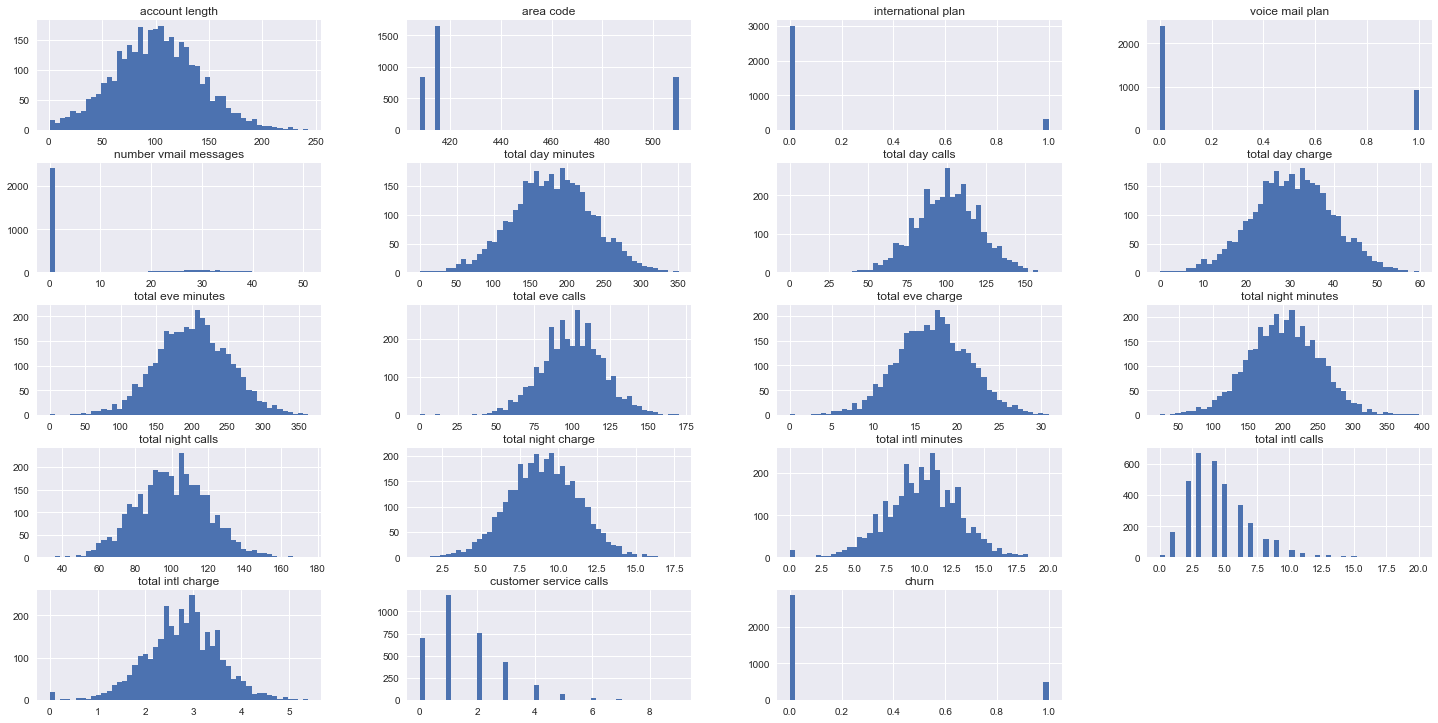

In [11]:
# plot histograms of all the columns in the set.
df.hist(bins=50, figsize=(25, 12.5))

Notes on distributions:
* Account length - normal distribution
* There are only 3 different area codes - how can that be if there are 51 different states? 
* Vast majority of customers do not have an international plan.
* About 1/3rd of customers have a voice mail plan.
* The vast majority of customers have 0 voice mail messages
* Other normal distributions (or approximately normal distributions): total day minutes, total day calls, total day charge, total eve minutes, total eve calls, total eve charge, total night minutes, total night calls, total night charge, total intl minutes, and total intl charge.
* Most people have had 0-2 customer service calls.
* Most people have had 2-4 international calls.

In [12]:
# double checking that there are only 3 area codes.
df['area code'].unique()

array([415, 408, 510], dtype=int64)

It doesn't make sense that there would only be 3 area codes while every state is represented. Is this column simply incorrect?

<AxesSubplot:>

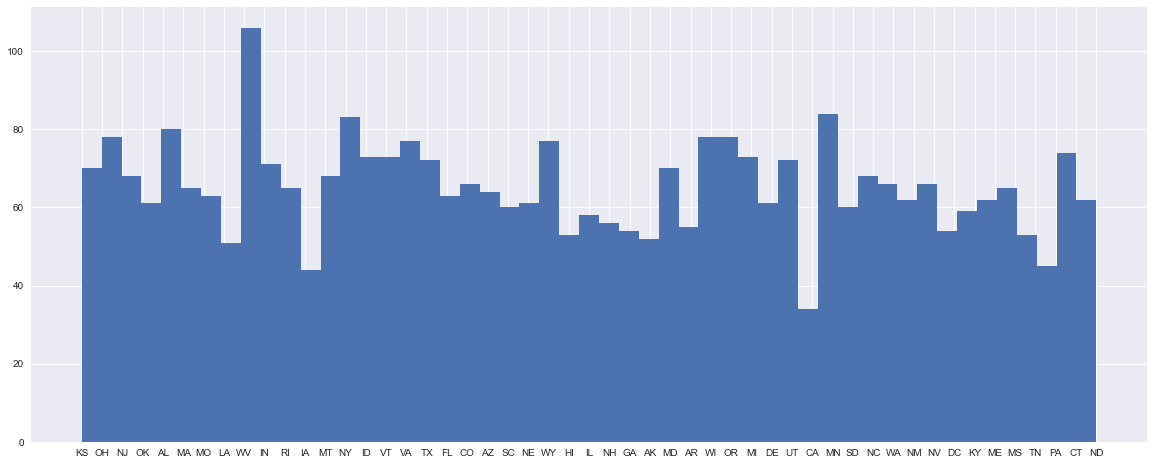

In [13]:
# histogram for states and their frequencies
df.state.hist(bins=51, figsize=(20, 8))

* Fairly even representation of states in the dataset. 
* DC is included as the 51st.
* WV (West Virginia) has the biggest representation in the dataset.

## Visualizing variables and churn rate

In [14]:
# going to create some bar graphs to get an idea for churn rate for some vars.
bar_vars = ['area code', 'international plan', 'voice mail plan', 
            'customer service calls', 'total intl calls']

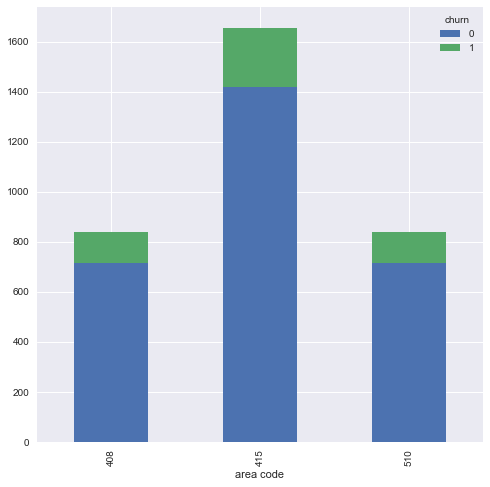

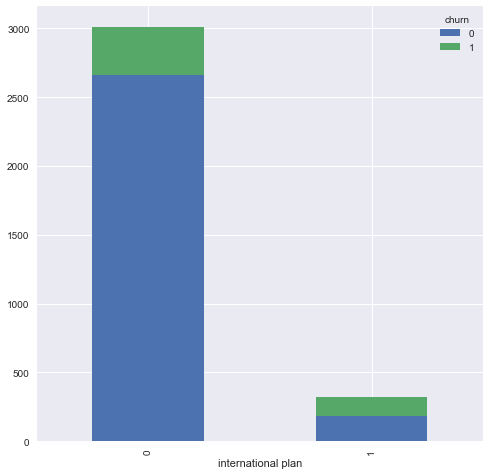

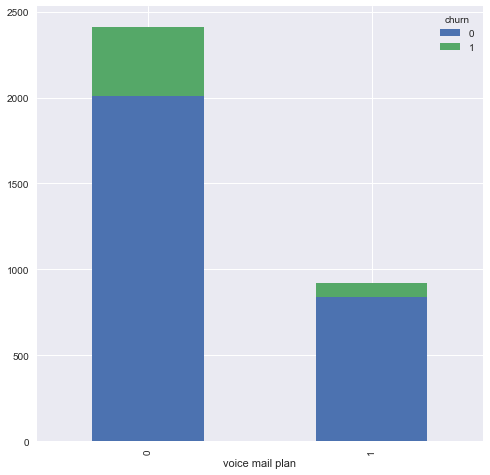

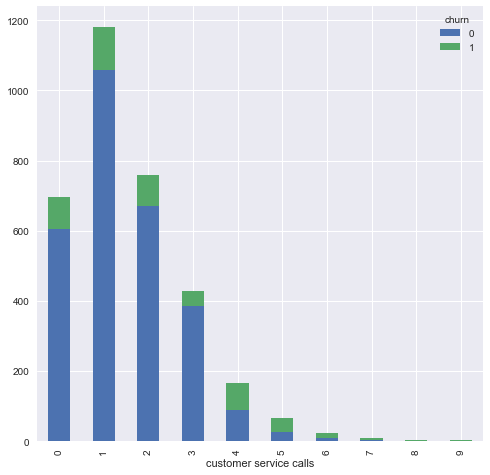

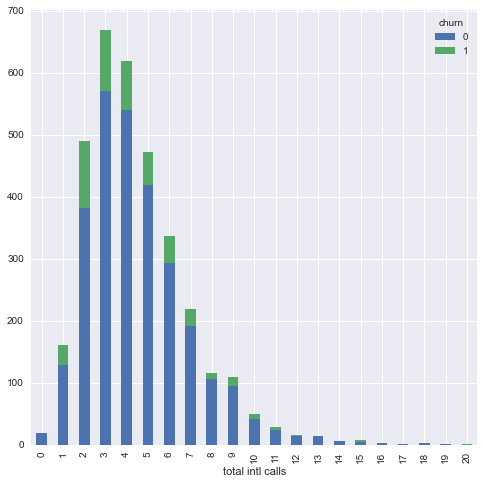

In [15]:
# visualize scatterplots of histograms with price as y variable
for v in bar_vars:
    df.groupby([v, "churn"]).size().unstack().plot(kind='bar', stacked=True, 
                                                   figsize=(8, 8)) 

<AxesSubplot:xlabel='state'>

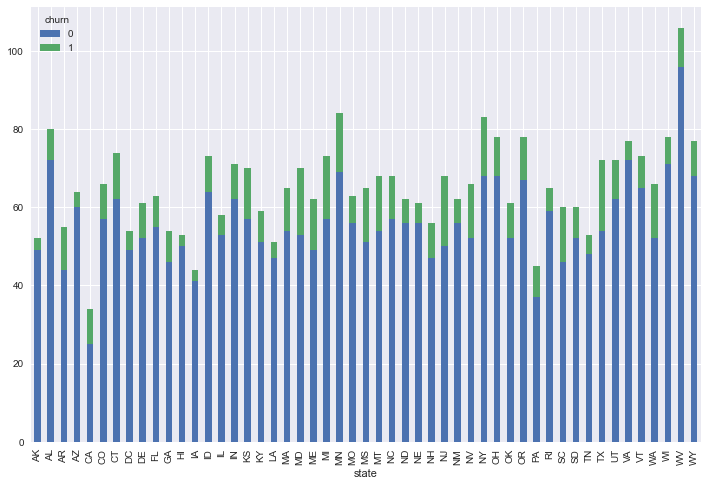

In [16]:
# check for state too
df.groupby(['state', "churn"]).size().unstack().plot(kind='bar', stacked=True, 
                                               figsize=(12, 8)) 

Comments on churn rates and variables evaluated thus far:
* Customers in area code 415 are more likely to churn than other area codes
* Customers with an international plan are more likely to churn than customers without one.
* Customers with a voice mail plan are more likely to churn than without one.
* Customers with 4 or more customer service calls are likely to churn.
* Customers with more than 6 international calls or less than 2 international calls are less likely to churn than those with 2-6.
* Some states have a particularly low churn rate such as Alaska, Hawaii, and Iowa, but it's difficult to tell from this histogram if state is a particularly important feature.

At this point, it does not seem that area code is a data column that was stored properly, and there are obviously issues with it; so it will be dropped from the dataset.

In [17]:
# dropping area code
df = df.drop(['area code'], axis=1)

In [18]:
df_s = pd.DataFrame()
df_s = df.groupby(['state', "churn"]).size().unstack()

# df_s is kind of a weird datatype... going to concat useful info into new df
dddd = df_s[1].reset_index()
ddd = df_s[0].reset_index()
df_states_churn = pd.concat([ddd['state'], ddd[0], dddd[1]], axis=1)
df_states_churn.columns = ['state', 'num_retained', 'num_churned']

In [19]:
# new column with churn rate (total customers - retained customers) / total
df_states_churn['churn rate'] = df_states_churn.apply(lambda x: ((x['num_retained'] +  x['num_churned']) - x['num_retained']) / (x['num_retained'] +  x['num_churned']), axis=1)
df_states_churn = df_states_churn.sort_values(['churn rate'], ascending=False)
df_states_churn = df_states_churn.reset_index(drop=True)
df_states_churn

,state,num_retained,num_churned,churn rate
0,NJ,50,18,0.264706
1,CA,25,9,0.264706
2,TX,54,18,0.250000
3,MD,53,17,0.242857
4,SC,46,14,0.233333
5,MI,57,16,0.219178
6,MS,51,14,0.215385
7,NV,52,14,0.212121
8,WA,52,14,0.212121
9,ME,49,13,0.209677


Text(0, 0.5, 'Churn Rate')

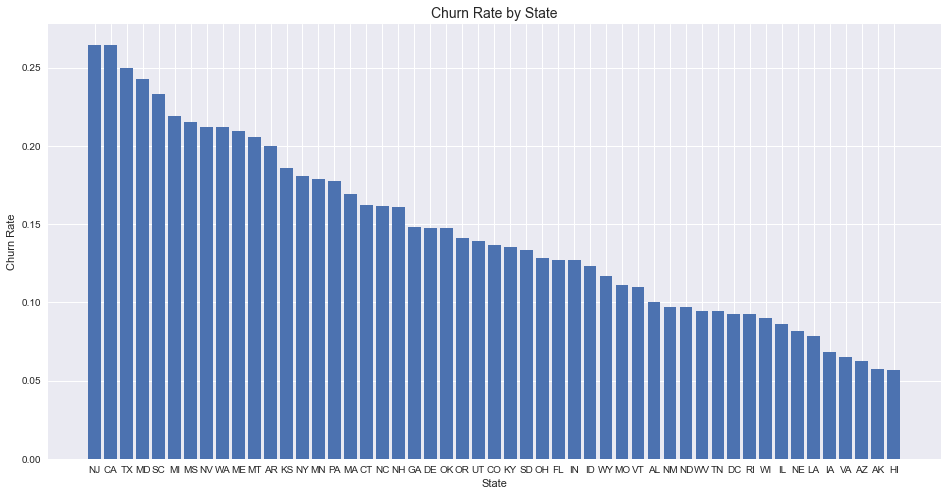

In [20]:
# visualize churn rate and states
plt.figure(figsize=(16, 8))
plt.bar(df_states_churn.state, df_states_churn['churn rate'])
plt.title('Churn Rate by State', fontsize=14)
plt.xlabel('State')
plt.ylabel('Churn Rate')

* New Jersey, California, and Texas have the highest churn rates with all being at least 25%. 
* Hawaii and Alaska have the lowest churn rates with slightly more than 5%.
* These data may indicate that this company is able to provide services in more remote regions with HI and AK representing the two lowest churn rates.

## Is longer account length associated with lower churn rate?

As a customer stays with the service longer, it is probably the case that they are more likely to continue with the service. It might be useful to look into trends of customers with a low account length vs. high account length. If customers can be retained in the short term, then they are probably more likely to continue with the service in the long term.

In [21]:
df['account length'].describe()

count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: account length, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2c17e5cbfd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2c17e5d96d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c17e5cbc70>],
 'medians': [<matplotlib.lines.Line2D at 0x2c17e5d9d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c17e5e7130>],
 'means': []}

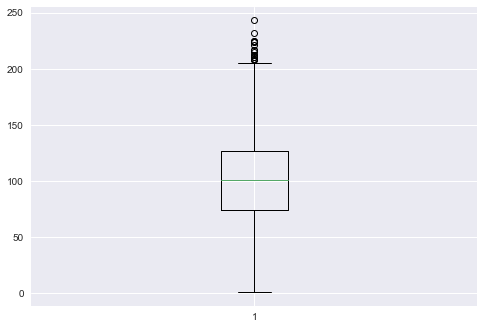

In [22]:
plt.boxplot(df['account length'])

In [23]:
# df with account length >= 75%
high_account_length = df.loc[df['account length'] >= 127.00]

In [24]:
# df with account length <= 25%
low_account_length = df.loc[df['account length'] <= 74.00]

In [25]:
# drop last 4 rows in high account length df
high_account_length.drop(high_account_length.tail(4).index, inplace = True)
high_account_length

C:\Users\samue\anaconda_3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
7,MO,147,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
9,WV,141,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
12,IA,168,0,0,0,128.8,96,21.90,104.9,71,8.92,141.1,128,6.35,11.2,2,3.02,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,OK,172,0,0,0,203.9,109,34.66,234.0,123,19.89,160.7,65,7.23,17.8,4,4.81,4,0
3311,LA,128,0,0,0,147.7,94,25.11,283.3,83,24.08,188.3,124,8.47,6.9,5,1.86,2,0
3312,SC,181,0,0,0,229.9,130,39.08,144.4,93,12.27,262.4,110,11.81,14.2,4,3.83,2,0
3313,ID,127,0,0,0,102.8,128,17.48,143.7,95,12.21,191.4,97,8.61,10.0,5,2.70,1,0


In [26]:
lst = [1] * 857
high_account_length['Long Account'] = lst

<ipython-input-26-8164c291913b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_account_length['Long Account'] = lst


In [27]:
lst = [0] * 857
low_account_length['Long Account'] = lst

<ipython-input-27-ee4d92db62c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_account_length['Long Account'] = lst


In [28]:
low_account_length = low_account_length[['churn', 'Long Account']]
high_account_length = high_account_length[['churn', 'Long Account']]

In [29]:
df_old_new_accounts = pd.concat([high_account_length, low_account_length], axis=0)
df_old_new_accounts

,churn,Long Account
0,0,1
2,0,1
7,0,1
9,0,1
12,0,1
...,...,...
3321,0,0
3322,1,0
3329,0,0
3330,0,0


<AxesSubplot:xlabel='Long Account'>

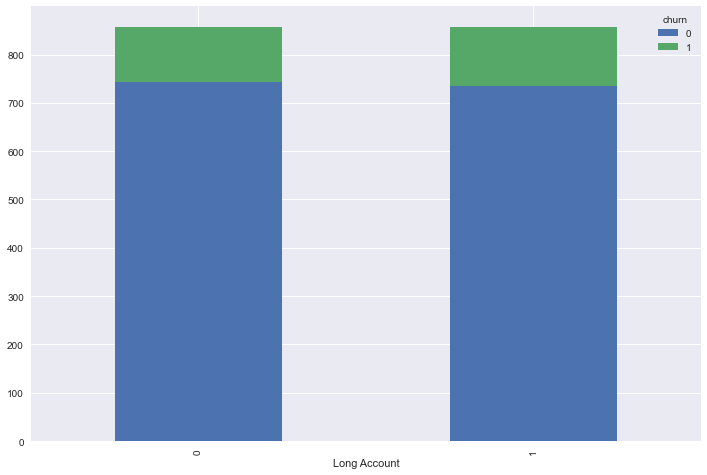

In [30]:
df_old_new_accounts.groupby(['Long Account', "churn"]).size().unstack().plot(
    kind='bar', stacked=True, figsize=(12, 8)) 

* The churn rate is similar for customers that are relatively new to the service versus customers that have retained the service for a longer time.

## Are customers only charged for international calls if they do not have a plan?

* It seems unclear what total international charge actually refers to.
* Does the international charge column include the plan that the customer has?
* If a customer has an international plan, is it safe to assume that the customer has always had that plan in the period of time this data was collected? It seems reasonable to assume so, or it might be a good idea to assume that the customer has had the plan for at least half of the time of their account length. * It might also be assumed that the customer had an international plan by the end of the data collection period.

In [55]:
# create df with relevant info (intl data)
df_intl = pd.DataFrame()
df_intl = df[['international plan', 'total intl minutes', 'total intl calls',
              'total intl charge', 'account length']].copy()

* So, it looks like customers are charged for international calls even if they have a plan.
* It's too soon to tell what the true relationship is between international charge and total international minutes given the assumptions discussed earlier.

In [56]:
# create a column with charge per international minute. It seems way more
# likely that the company is charging per minute, not per call.
df_intl['intl_charge_per_hour'] = df_intl.apply(lambda x: (x['total intl charge'] / x['total intl minutes']) * 60,
                                                 axis=1)
df_intl.head()

<ipython-input-56-aeeaf984aabf>:3: RuntimeWarning: invalid value encountered in double_scalars
  df_intl['intl_charge_per_hour'] = df_intl.apply(lambda x: (x['total intl charge'] / x['total intl minutes']) * 60,


,international plan,total intl minutes,total intl calls,total intl charge,account length,intl_charge_per_hour
0,0,10.0,3,2.70,128,16.200000
1,0,13.7,3,3.70,107,16.204380
2,0,12.2,5,3.29,137,16.180328
3,1,6.6,7,1.78,84,16.181818
4,1,10.1,3,2.73,75,16.217822


In [57]:
df_intl.intl_charge_per_hour.describe()

count    3315.000000
mean       16.203393
std         0.019735
min        16.090909
25%        16.188679
50%        16.200000
75%        16.217822
max        16.363636
Name: intl_charge_per_hour, dtype: float64

In [60]:
# find average charge per international hour for customers with and without
# an international plan
ave_charge_intlplan = df_intl.loc[df_intl['international plan'] == 1,
                                  'intl_charge_per_hour'].mean()
ave_charge_no_intlplan = df_intl.loc[df_intl['international plan'] == 0,
                                  'intl_charge_per_hour'].mean()
print(ave_charge_intlplan, ave_charge_no_intlplan)

16.202296346338677 16.203511095061724


* There is almost no difference between how much customers pay for international minutes if they do or do not have an international plan.
* This discovery begs the question- what does the international plan even do?

<AxesSubplot:xlabel='international plan'>

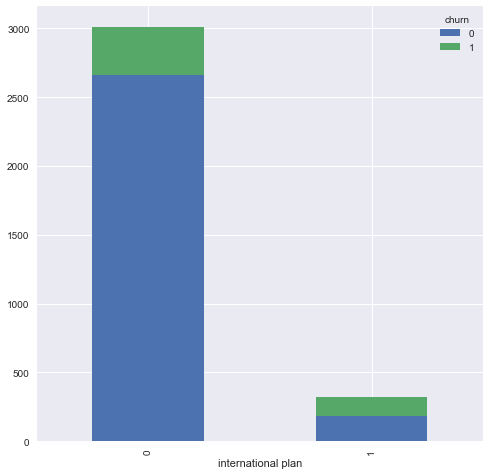

In [62]:
# recall the churn rate for international plans
df.groupby(['international plan', 'churn']).size().unstack().plot(kind='bar', stacked=True, 
                                                   figsize=(8, 8))

In [65]:
# what are the exact churn rates for customers with and without an intl plan?
international_plan_churn = df.loc[df['international plan'] == 1,
                                  'churn'].mean()
no_international_plan_churn = df.loc[df['international plan'] == 0,
                                  'churn'].mean()
print(round(international_plan_churn*100, 2), 
      round(no_international_plan_churn*100, 2))

42.41 11.5


* The churn rate for customers with an international plan is 42.41% and the churn rate for customers without one is 11.5%.
* Given the findings in this section, it seems as though the international plan does absolutely nothing, and customers are probably unhappy with the plan, which causes high churn.

## Is total charge for the customer associated with churn?

* If a customer is paying an exorbitant amount for their service, it would be logical to assume they would probably shop around for another service, and thus, higher amounts may be associated with higher churn rates.
* International charge will not be included in total charge because it seems redundant to include this data due to the findings in the previous section.

In [31]:
df[['total day charge', 'total eve charge', 'total night charge']].describe()

,total day charge,total eve charge,total night charge
count,3333.000000,3333.000000,3333.000000
mean,30.562307,17.083540,9.039325
std,9.259435,4.310668,2.275873
min,0.000000,0.000000,1.040000
25%,24.430000,14.160000,7.520000
50%,30.500000,17.120000,9.050000
75%,36.790000,20.000000,10.590000
max,59.640000,30.910000,17.770000


In [66]:
df_charges = pd.DataFrame()
df_charges = df[['total day charge', 'total eve charge', 'total night charge',
                 'account length', 'churn']].copy()

df_charges['total_charge'] = df_charges.apply(lambda x: x['total day charge'] + x['total eve charge'] + x['total night charge'],
                                             axis=1) 

df_charges['typical_total_monthly_charge'] = df_charges.apply(lambda x: x['total_charge'] / x['account length'],
                                                        axis=1)
df_charges = df_charges[['typical_total_monthly_charge', 'churn']]
df_charges.head()

,typical_total_monthly_charge,churn
0,0.569219,0
1,0.519065,0
2,0.430657,0
3,0.774048,0
4,0.658133,0


In [45]:
df_charges.describe()

,typical_total_monthly_charge,churn
count,3333.000000,3333.000000
mean,0.930584,0.144914
std,2.927339,0.352067
min,0.158488,0.000000
25%,0.447424,0.000000
50%,0.589368,0.000000
75%,0.815570,0.000000
max,69.950000,1.000000


The maximum average monthly payment is quite high compared to the mean.

{'whiskers': [<matplotlib.lines.Line2D at 0x2c1001a8c40>,
 'caps': [<matplotlib.lines.Line2D at 0x2c17c6d9580>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c1001a80d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2c17c7cbb80>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c100bf6400>],
 'means': []}

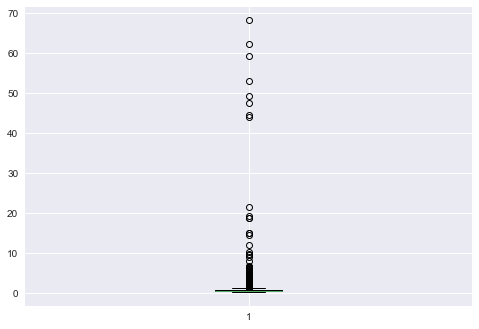

In [67]:
plt.boxplot(df_charges.typical_total_monthly_charge)

# Conclusions

## Main findings

* Area code does not seem like a useful column as it is likely incorrectly stored in the dataset.
* Customers with an international plan are more likely to churn than customers without one.
* Customers with a voice mail plan are more likely to churn than without one.
* Customers with 4 or more customer service calls are likely to churn.
* Customers with more than 6 international calls or less than 2 international calls are less likely to churn than those with 2-6.
* New Jersey, California, and Texas have the highest churn rates with all being at least 25%. 
* Hawaii and Alaska have the lowest churn rates with slightly more than 5%.
* The international plan does not seem to offer any value.
* The churn rate for customers with an international plan is 42.41% and the churn rate for customers without one is 11.5%.

## Potential Recommendations

* Due to the churn rates associated with international and voice mail plans, it may be useful to develop better plans or lower the cost of these plans in order to retain customers.
* Customers with repeated calls (4+) are likely to churn, so it would be useful to invest more money into developing better customer service in order to retain business.
* These data may indicate that this company is able to provide services in more remote regions with HI and AK representing the two lowest churn rates.
* Immediately improve the international plan or remove it entirely.